# Chapter 1 Environmental Engineering: BOD equation

1. [Introduction: BOD equation](#1.-Introduction)
2. [Simulation: BOD](#2.-Simulation)
3. [Self-Assessment](#3.-Self-Assessment)

## 1. Introduction

### 🌊 Biochemical Oxygen Demand (BOD) Modeling – Description & Analysis


**Biochemical Oxygen Demand (BOD)** measures the amount of **dissolved oxygen** required by **aerobic microorganisms** to biologically degrade organic matter in water over a specific time period — typically 5 days, known as **BOD₅**.


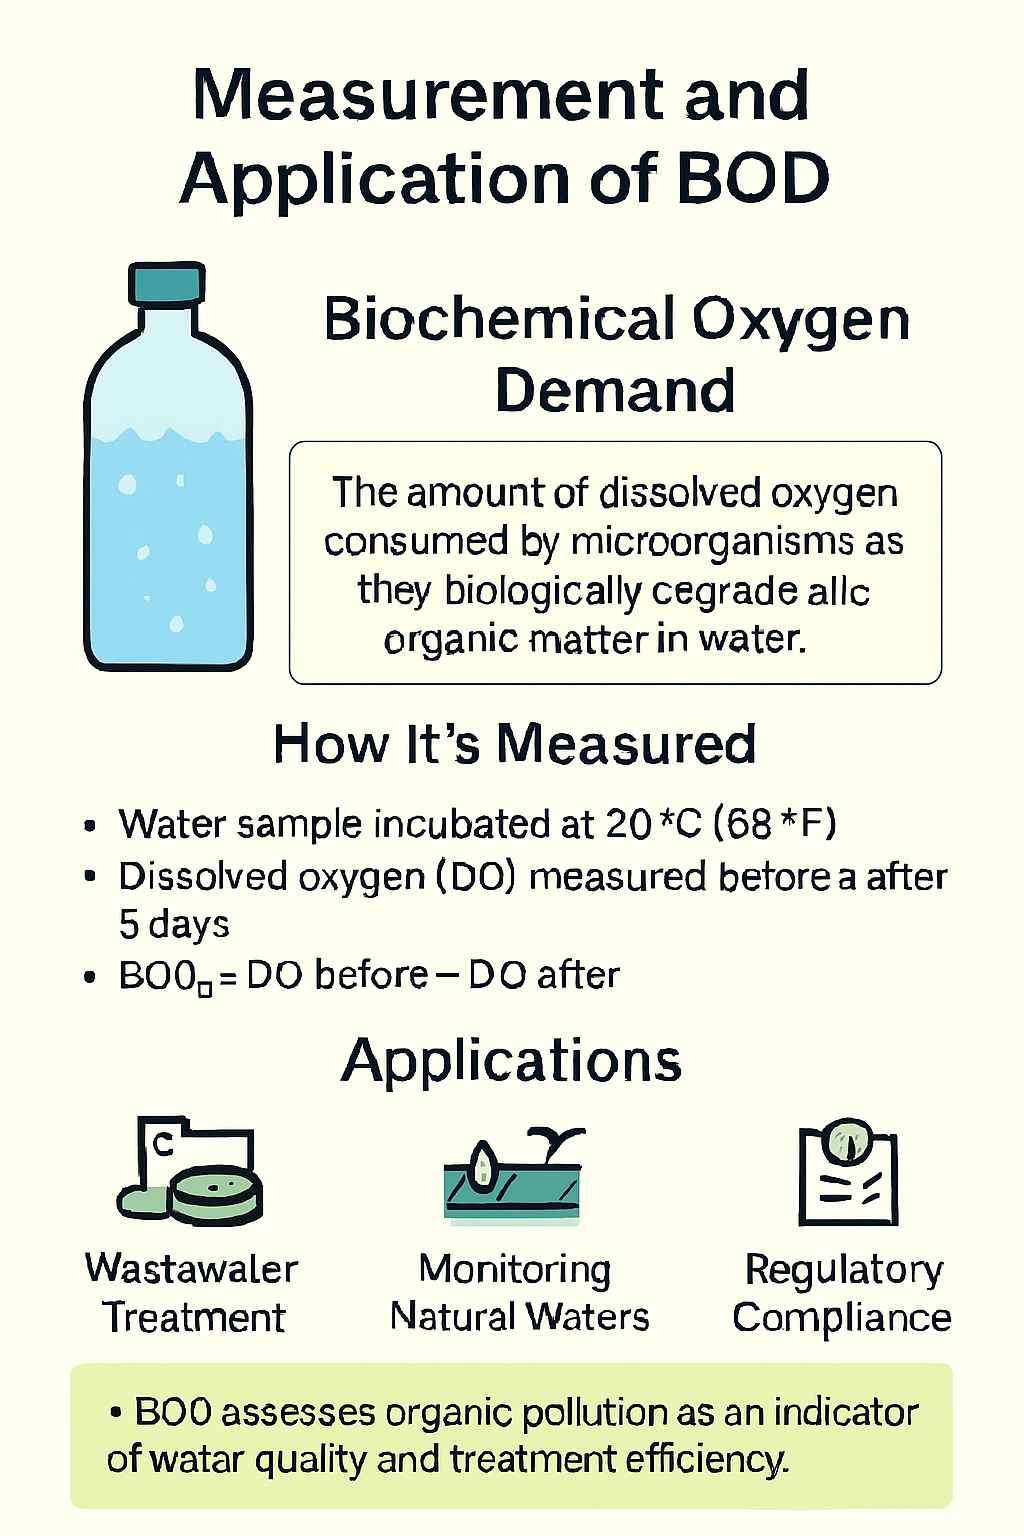


### ✅ Why It Matters

- High BOD indicates a large amount of **organic pollution** (e.g., sewage, decaying vegetation, industrial waste).
- Microbes consume oxygen to break down this material.
- If BOD is too high, **dissolved oxygen (DO)** levels drop, leading to **hypoxia** or **dead zones**.
- Aquatic organisms like fish and invertebrates require oxygen — low DO can be fatal.

### 🧪 Applications

- BOD is used to assess the **efficiency of wastewater treatment plants**.
- Lower BOD in effluent = better treatment performance.
- Environmental agencies (e.g., **EPA**) set BOD limits for discharge.
- It’s a key metric in **water quality standards**, **permits**, and **ecosystem health assessments**.

---

### 📊 Typical BOD Values

| Water Type           | BOD (mg/L) |
|----------------------|------------|
| Pristine river       | < 1        |
| Moderately polluted  | 2–8        |
| Untreated sewage     | 200–600    |
| Treated wastewater   | < 20       |

---

### 🔬 Oxygen Demand Types

1. **BOD (Biological Oxygen Demand)**  
   Oxygen consumed by microorganisms to biologically degrade organic matter over time (typically 5 days).

2. **COD (Chemical Oxygen Demand)**  
   Oxygen equivalent consumed by chemical oxidants (e.g., dichromate) to oxidize organic and inorganic matter.

3. **ThOD (Theoretical Oxygen Demand)**  
   Stoichiometric oxygen required to fully oxidize known compounds (e.g., glucose) to CO₂ and H₂O.

---

### ⚖️ COD vs BOD: Why BOD Is Still Used

Although **COD** is faster and more operationally convenient, **BOD remains essential** for several key reasons:

#### ✅ 1. Biological Relevance
- BOD reflects **actual microbial activity** — what nature does.
- COD includes **non-biodegradable substances** (e.g., detergents, solvents).
- BOD shows how much oxygen aquatic life will lose due to microbial respiration.

#### ✅ 2. Ecological Impact Assessment
- BOD is directly tied to **oxygen depletion** in rivers, lakes, and estuaries.
- It’s essential for modeling **hypoxia**, **eutrophication**, and **fish kills**.

#### ✅ 3. Regulatory Standards
- Agencies like **EPA** and the **EU Water Framework Directive** require BOD monitoring.
- It’s a benchmark for **effluent discharge permits** and **water body classification**.

#### ✅ 4. Wastewater Treatment Design
- BOD is used to size **aeration tanks**, **sludge digesters**, and **biological reactors**.
- It reflects the **biodegradable load** treatment systems must handle.

#### ✅ 5. Complementary to COD
- COD is often **higher than BOD** because it oxidizes everything.
- The **BOD/COD ratio** is used to assess **biodegradability**:

$
\text{BOD/COD} > 0.5 \quad \text{→ Highly biodegradable} \\
\text{BOD/COD} < 0.3 \quad \text{→ Poorly biodegradable}
$

---

## 🧠 Conceptual Reflection

> COD tells you **how much oxygen is needed chemically**,  
> BOD tells you **how much oxygen nature will actually consume**.

---

## ❓ Quiz Questions

1. Why is COD faster than BOD?
2. What does a low BOD/COD ratio indicate?
3. Why is BOD preferred for ecological impact studies?
4. Which parameter is more useful for operational monitoring?
5. How does BOD relate to dissolved oxygen and aquatic life?


## 2. Simulation

this document provides a conceptual overview and practical guide to estimating Biochemical Oxygen Demand (BOD) using a first-order decay model. It includes the governing equation, parameter interpretation, and sensitivity analysis guidance.

---

### The BOD Equation

The BOD equation models the oxygen consumed by microorganisms as they decompose organic matter over time. The **first-order kinetic equation** is:

$$
BOD_t = L_0 \left(1 - e^{-k t} \right)
$$

Where:
- $( BOD_t $) : oxygen demand exerted at time $( t $) (mg/L)
- $( L_0 $) : ultimate BOD — the total biodegradable organic content (mg/L)
- $( k $) : BOD rate constant (1/day), depends on temperature and wastewater type
- $( t $) : time (days)

This curve starts at 0 and asymptotically approaches $( L_0 $) as time increases.

---

### Parameter Estimation

### 1. **Estimating $( L_0 $) and $( k $)** from BOD Data

If you have experimental BOD measurements at multiple times (e.g., BOD₅, BOD₇), you can estimate the parameters by fitting the equation using nonlinear regression.

Common techniques:
- **Curve fitting** using least squares (e.g., `scipy.optimize.curve_fit`)
- **Linearization** via:
  $ \ln\left(1 - \frac{BOD_t}{L_0}\right) = -k t$
 
  (used cautiously, as it requires an estimate of $( L_0 $))

### 2. **Temperature Adjustment (Optional)**

The rate constant $( k $) varies with temperature. It can be adjusted using the Arrhenius-type equation:

$$
k_T = k_{20} \cdot \theta^{(T - 20)}
$$

Where:
- $( k_T $): rate at temperature $( T $) (°C)
- $( \theta $): temperature coefficient, typically ≈ 1.047
- $( k_{20} $): rate at 20°C
---

### Sensitivity Analysis

Understanding how the model behaves with varying parameters is crucial for robust interpretation.

### 🔹 Effect of Ultimate BOD (L₀)

- **Higher L₀** → increases the maximum oxygen demand
- Reflects greater organic pollution load

### 🔸 Effect of Rate Constant (k)

- **Higher k** → curve reaches L₀ faster (faster degradation)
- Influenced by temperature, microbial activity, and water conditions

###  Combined Impact

| Parameter | Behavior | Effect on BOD Curve |
|-----------|----------|---------------------|
| ↑ L₀      | Increases asymptote | Curve rises higher |
| ↑ k       | Faster approach to L₀ | Curve becomes steeper |
| ↓ k       | Slower reaction | Flattened curve |

Use an interactive plot to visualize these effects dynamically.


###  Applications

- Wastewater treatment modeling - Water quality monitoring - Design of secondary treatment systems - Environmental impact assessments


###  Recommended Practice

- Calibrate \( k \) using laboratory BOD₅ and BOD ultimate tests
- Simulate BOD curves under different conditions using sliders
- Perform sensitivity testing to identify key risk factors in oxygen depletion

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def compute_bod(t, L0, k):
    return L0 * (1 - np.exp(-k * t))

def plot_bod_interactive(L0, k, t_end):
    t = np.linspace(0, t_end, 100)
    BOD_t = compute_bod(t, L0, k)

    plt.figure(figsize=(8, 5))
    plt.plot(t, BOD_t, label=f'L₀ = {L0} mg/L, k = {k} /day', color='seagreen')
    plt.xlabel("Time (days)")
    plt.ylabel("BOD exerted (mg/L)")
    plt.title("📉 Biochemical Oxygen Demand (BOD) Curve")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create interactive sliders
interact(
    plot_bod_interactive,
    L0=FloatSlider(value=20.0, min=5.0, max=50.0, step=0.5, description="Ultimate BOD L₀"),
    k=FloatSlider(value=0.2, min=0.05, max=0.5, step=0.01, description="Decay Rate k"),
    t_end=IntSlider(value=10, min=2, max=30, step=1, description="Time (days)")
)

interactive(children=(FloatSlider(value=20.0, description='Ultimate BOD L₀', max=50.0, min=5.0, step=0.5), Flo…

<function __main__.plot_bod_interactive(L0, k, t_end)>

## 3. Self-Assessment

###  Self-Study: Biochemical Oxygen Demand (BOD) Modeling

This self-assessment module accompanies the interactive BOD simulation tool. Use the following questions to test and reflect on your understanding of first-order BOD kinetics, parameter behavior, and real-world implications.

---

### Conceptual Questions

1. **What does the decay constant \( k \) represent physically in the BOD equation?**

2. **Why does the BOD curve approach an asymptote over time instead of increasing linearly?**

3. **How would BOD curves differ between raw sewage and treated effluent with identical \( L_0 \) values?**

4. **Why does temperature affect the BOD rate constant, and how can you adjust for it in the model?**

5. **What are some limitations of applying the first-order BOD model to field measurements?**

---

### Reflective Prompts

1. **If two samples have the same ultimate BOD \( L_0 \) but different \( k \), which depletes oxygen faster? What does this imply about biological activity?**

2. **How does the selected time duration for simulation (e.g., 5 vs. 20 days) impact conclusions about wastewater treatability?**

3. **How might this model assist in optimizing aeration tank sizing or retention times in treatment design?**

4. **In what ways could overestimating or underestimating \( k \) affect environmental protection decisions?**

5. **How can this tool be used to communicate treatment performance to stakeholders or students?**

---

### Quiz Questions

**Q1.** The unit of the decay constant $( k $) in the BOD equation is:  
A. mg/L  
B. days  
C. 1/day  
D. dimensionless  
✅ **Correct Answer:** C

---

**Q2.** Increasing $( L_0 $) while keeping $( k $) constant results in:  
A. Faster oxygen consumption  
B. A lower final BOD level  
C. A higher oxygen demand curve  
D. No change to the BOD curve  
✅ **Correct Answer:** C

---

**Q3.** A higher rate constant $( k $) corresponds to:  
A. Slower breakdown of organics  
B. Delayed oxygen consumption  
C. Faster BOD exertion  
D. Higher ultimate BOD  
✅ **Correct Answer:** C

---

**Q4.** The BOD equation $( BOD_t = L_0(1 - e^{-kt}) $) describes:  
A. Exponential growth  
B. First-order decay toward saturation  
C. Linear depletion  
D. Logistic decline  
✅ **Correct Answer:** B

---

**Q5.** The BOD exerted at time zero is:  
A. $( L_0 $)  
B. Zero  
C. $( k \cdot L_0 $)  
D. Negative  
✅ **Correct Answer:** B
